<a href="https://colab.research.google.com/github/Mamatha22mh1a4249/DeepLearning-Lab/blob/main/EXPERIMENT_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from numpy.random import seed
seed(0xdeadbeef)
import tensorflow as tf
tf.random.set_seed(0xdeadbeef)
from tensorflow import keras
imdb = keras.datasets.imdb
num_words = 20000
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(seed=1,
num_words=num_words)
print(train_data[0])
print('label:', train_labels[0])

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
[1, 13, 28, 1039, 7, 14, 23, 1856, 13, 104, 36, 4, 699, 8060, 144, 297, 14, 175, 291, 18, 4, 375, 1784, 153, 38, 15, 75, 92, 859, 51, 16, 5, 15, 75, 377, 24, 8, 81, 4, 172, 2497, 174, 40, 1489, 49, 84, 11, 4, 2030, 3039, 121, 36, 92, 4881, 14, 20, 2, 9, 40, 6, 2, 621, 18, 148, 37, 191, 1941, 42, 511, 14, 20, 9, 17, 76, 253, 17, 269, 8, 3336, 4, 2, 8, 1278, 6, 543, 2647, 10, 10, 308, 3102, 2, 47, 43, 188, 46, 7, 1172, 5, 240, 2854, 145, 8, 4, 154, 3243, 11, 4819, 58, 18, 35, 32, 8, 327, 823, 7, 7350, 7, 265, 308, 1828, 145, 1646, 4, 154, 890, 5, 9, 14412, 34, 362, 2515, 154, 1914, 5, 27, 15227, 2, 17, 36, 837, 5, 1941, 32, 367, 4, 96, 10, 10, 13, 62, 386, 14, 48, 13, 16, 3178, 42, 48, 11, 882, 294, 16, 3412, 2, 4360, 2, 34, 6, 1042, 18, 2, 345, 96, 14, 9, 6, 862, 526, 3757, 917, 5, 60, 1055, 13, 115, 197, 474, 1829, 15, 2006, 7, 6791, 113, 19, 4, 2, 261, 13, 104, 4, 1653, 173, 7, 4, 65, 143, 4, 3801, 1366, 548, 844, 5, 4, 837, 1396, 27,

In [2]:
vocabulary = imdb.get_word_index()

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
vocabulary = {k:(v+3) for k,v in vocabulary.items()}
vocabulary["<PAD>"] = 0

In [4]:
vocabulary["<START>"] = 1
vocabulary["<UNK>"] = 2  # unknown
vocabulary["<UNUSED>"] = 3

In [5]:
index = dict([(value, key) for (key, value) in vocabulary.items()])
def decode_review(text):
    '''converts encoded text to human readable form. each integer in the text is looked up in the
index, and replaced by the corresponding word. '''
    return ' '.join([index.get(i, '?') for i in text])
decode_review(train_data[0])
train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value=vocabulary["<PAD>"],
                                                        padding='post',
                                                        maxlen=256)
test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value=vocabulary["<PAD>"],
                                                       padding='post',
                                                       maxlen=256)
train_data[1]
model = keras.Sequential()

In [6]:
model.add(keras.layers.Embedding(len(vocabulary), 2, input_length=256))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [7]:
model.add(keras.layers.Flatten())

In [8]:
model.add(keras.layers.Dropout(rate=0.5))

In [9]:
model.add(keras.layers.Dense(5))

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.5277 - loss: 0.6894 - val_accuracy: 0.7423 - val_loss: 0.5811
Epoch 2/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7732 - loss: 0.4981 - val_accuracy: 0.8609 - val_loss: 0.3461
Epoch 3/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8609 - loss: 0.3286 - val_accuracy: 0.8632 - val_loss: 0.3178
Epoch 4/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8899 - loss: 0.2692 - val_accuracy: 0.8752 - val_loss: 0.2982
Epoch 5/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9065 - loss: 0.2308 - val_accuracy: 0.8724 - val_loss: 0.3026


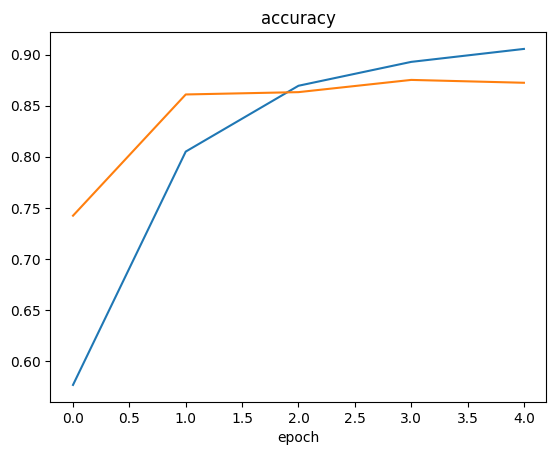

<Figure size 640x480 with 0 Axes>

In [10]:
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.summary()
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_data,
                    train_labels,
                    epochs=5,
                    batch_size=100,
                    validation_data=(test_data, test_labels),
                    verbose=1)
import matplotlib.pyplot as plt
def plot_accuracy(history, miny=None):
  acc = history.history['accuracy']
  test_acc = history.history['val_accuracy']
  epochs = range(len(acc))
  plt.plot(epochs, acc)
  plt.plot(epochs, test_acc)
  if miny:
    plt.ylim(miny, 1.0)
  plt.title('accuracy')
  plt.xlabel('epoch')
  plt.figure()
plot_accuracy(history)